In [1]:
import pandas as pd
import json
import requests
import prettytable
from config import api_key
import matplotlib.pyplot as plt
import numpy as np
import bls

In [76]:
series_dict = {
    
    #Food, Apparel and Entertaiment across all regions 
    
    'CXUFOODAWAYLB1101M': 'FoodAway_AllRegions',
    'CXUAPPARELLB1101M': 'Apparel_AllRegions',
    'CXUENTRTAINLB1101M': 'Entertainment_AllRegions',
    
    #Apparel breakdown across all regions 
    
    'CXUBOYSLB1101M': 'Boys_Apparel',
    'CXUINFANTLB1101M': 'Infant_Apparel',
    'CXUGIRLSLB1101M': 'Girls_Apparel',
    'CXUMENSLB1101M': 'Mens_Apparel',
    'CXUWOMENSLB1101M': 'Women_Apparel',
    'CXUFOOTWEARLB1101M': 'Footwear',
    
    #Entertainment breakdown across all regions
    
    'CXUFEESADMLB1101M': 'Fees and Admissions',
    'CXUPETSPLAYLB1101M': 'Pets, Toys and Playground Equipment',
    'CXUTVAUDIOLB1101M': 'Audio and Visual Equipment and Services',
    
    #Entertainment across 4 regions
    
    'CXUENTRTAINLB1102M': 'Entertainment in Northeast',
    'CXUENTRTAINLB1103M': 'Entertainment in Midwest',
    'CXUENTRTAINLB1104M': 'Entertainment in South',
    'CXUENTRTAINLB1105M': 'Entertainment in West',
    
    #Apparel across 4 regions
    
    'CXUAPPARELLB1102M': 'Apparel in Northeast',
    'CXUAPPARELLB1103M': 'Apparel in Midwest',
    'CXUAPPARELLB1104M': 'Apparel in South',
    'CXUAPPARELLB1105M': 'Apparel in West',
    
}

In [77]:
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": list(series_dict.keys()),"startyear":"2005", "endyear":"2018","registrationkey":api_key})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)
try:
    df = pd.DataFrame()
    for series in json_data['Results']['series']:
        df_initial = pd.DataFrame(series)
        series_col = df_initial['seriesID'][0]
        for i in range(0, len(df_initial) - 1):
            df_row = pd.DataFrame(df_initial['data'][i])
            df_row['seriesID'] = series_col
            if 'code' not in str(df_row['footnotes']): 
                df_row['footnotes'] = ''
            else:
                df_row['footnotes'] = str(df_row['footnotes']).split("'code': '",1)[1][:1]
            df = df.append(df_row, ignore_index=True)
    df.to_csv('blsdata.csv', index=False)
except:
    json_data['status'] == 'REQUEST_NOT_PROCESSED'
    print('BLS API has given the following Response:', json_data['status'])
    print('Reason:', json_data['message'])

In [78]:
df

,year,period,periodName,latest,value,footnotes,seriesID
0,2018,A01,Annual,true,3459,,CXUFOODAWAYLB1101M
1,2017,A01,Annual,NaN,3365,,CXUFOODAWAYLB1101M
2,2016,A01,Annual,NaN,3154,,CXUFOODAWAYLB1101M
3,2015,A01,Annual,NaN,3008,,CXUFOODAWAYLB1101M
4,2014,A01,Annual,NaN,2787,,CXUFOODAWAYLB1101M
...,...,...,...,...,...,...,...
255,2010,A01,Annual,NaN,1932,,CXUAPPARELLB1105M
256,2009,A01,Annual,NaN,1844,,CXUAPPARELLB1105M
257,2008,A01,Annual,NaN,1888,,CXUAPPARELLB1105M
258,2007,A01,Annual,NaN,2042,,CXUAPPARELLB1105M


In [79]:
df.dtypes

year          object
period        object
periodName    object
latest        object
value         object
footnotes     object
seriesID      object
dtype: object

In [80]:
df['value'] = df['value'].astype(float)
df = df.sort_values('year', ascending = True).reset_index(drop=True)
df

,year,period,periodName,latest,value,footnotes,seriesID
0,2006,A01,Annual,NaN,606.0,,CXUFEESADMLB1101M
1,2006,A01,Annual,NaN,91.0,,CXUBOYSLB1101M
2,2006,A01,Annual,NaN,96.0,,CXUINFANTLB1101M
3,2006,A01,Annual,NaN,122.0,,CXUGIRLSLB1101M
4,2006,A01,Annual,NaN,353.0,,CXUMENSLB1101M
...,...,...,...,...,...,...,...
255,2018,A01,Annual,true,2137.0,,CXUAPPARELLB1102M
256,2018,A01,Annual,true,78.0,,CXUINFANTLB1101M
257,2018,A01,Annual,true,1872.0,,CXUAPPARELLB1103M
258,2018,A01,Annual,true,2778.0,,CXUENTRTAINLB1104M


In [81]:
total_foodaway = df.groupby('seriesID')['value'].sum()["CXUFOODAWAYLB1101M"]
total_foodaway = int(total_foodaway)
total_foodaway

36880

In [82]:
total_apparel = df.groupby('seriesID')['value'].sum()["CXUAPPARELLB1101M"]
total_apparel = int(total_apparel)
total_apparel

23195

In [83]:
total_ent = df.groupby('seriesID')['value'].sum()["CXUENTRTAINLB1101M"]
total_ent = int(total_ent)
total_ent

35677

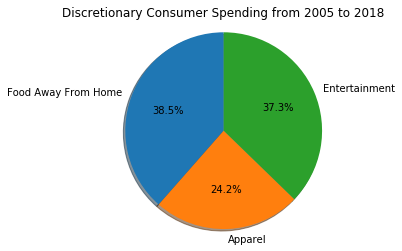

In [84]:
labels = 'Food Away From Home', 'Apparel', 'Entertainment'
sizes = [total_foodaway, total_apparel, total_ent]
explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Apparel')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Discretionary Consumer Spending from 2005 to 2018')
plt.show()

In [85]:
#list of demo codes then series ids
#for loop, for demo codes, go through age range list 


north_east = df.groupby('seriesID')['value'].sum()["CXUENTRTAINLB1102M"]
north_east = int(north_east)
north_east

mid_west = df.groupby('seriesID')['value'].sum()["CXUENTRTAINLB1103M"]
mid_west = int(mid_west)
mid_west

south_ent = df.groupby('seriesID')['value'].sum()["CXUENTRTAINLB1104M"]
south_ent = int(south_ent)
south_ent

west_ent = df.groupby('seriesID')['value'].sum()["CXUENTRTAINLB1105M"]
west_ent = int(west_ent)
west_ent

41036

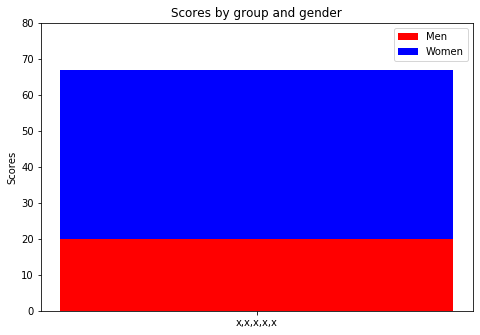

In [94]:
#discretionary income by geographic 

#N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
ind = "x,x,x,x,x"#np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, menMeans, width, color='r')
ax.bar(ind, womenMeans, width,bottom=menMeans, color='b')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Men', 'Women'])
plt.show()


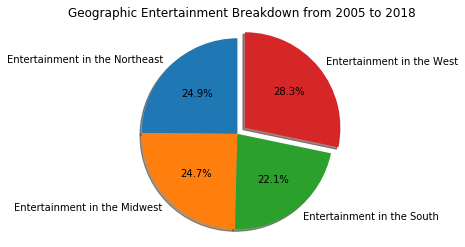

In [86]:
labels =  'Entertainment in the Northeast','Entertainment in the Midwest', 'Entertainment in the South', 'Entertainment in the West'
sizes = [north_east, mid_west, south_ent, west_ent]
explode = ( 0, 0, 0, .1)  # only "explode" the 2nd slice (i.e. 'Apparel')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Geographic Entertainment Breakdown from 2005 to 2018')
plt.show()

In [88]:
northeast_apparel = df.groupby('seriesID')['value'].sum()["CXUAPPARELLB1102M"]
northeast_apparel = int(northeast_apparel)
northeast_apparel

midwest_apparel = df.groupby('seriesID')['value'].sum()["CXUAPPARELLB1103M"]
midwest_apparel = int(midwest_apparel)
midwest_apparel

south_apparel = df.groupby('seriesID')['value'].sum()["CXUAPPARELLB1104M"]
south_apparel = int(south_apparel)
south_apparel

west_apparel = df.groupby('seriesID')['value'].sum()["CXUAPPARELLB1105M"]
west_apparel = int(west_apparel)
west_apparel

25854

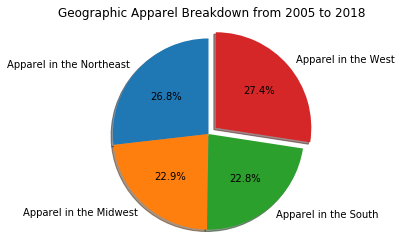

In [90]:
labels =  'Apparel in the Northeast','Apparel in the Midwest', 'Apparel in the South', 'Apparel in the West'
sizes = [northeast_apparel, midwest_apparel, south_apparel, west_apparel]
explode = ( 0, 0, 0, .1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Geographic Apparel Breakdown from 2005 to 2018')
plt.show()

In [ ]:
boys_apparel = df.groupby('seriesID')['value'].sum()["CXUBOYSLB1101M"]
boys_apparel = int(boys_apparel)
boys_apparel

girls_apparel = df.groupby('seriesID')['value'].sum()["CXUGIRLSLB1101M"]
girls_apparel = int(girls_apparel)
girls_apparel

men_apparel = df.groupby('seriesID')['value'].sum()["CXUMENSLB1101M"]
men_apparel = int(men_apparel)
men_apparel

women_apparel = df.groupby('seriesID')['value'].sum()["CXUWOMENSLB1101M"]
women_apparel = int(women_apparel)
women_apparel

footwear = df.groupby('seriesID')['value'].sum()["CXUFOOTWEARLB1101M"]
footwear = int(footwear)
footwear


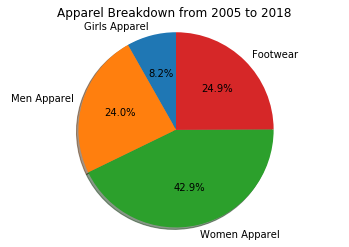

In [60]:
labels =  'Girls Apparel','Men Apparel', 'Women Apparel', 'Footwear'
sizes = [girls_apparel, men_apparel, women_apparel, footwear]
explode = ( 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Apparel')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Apparel Breakdown from 2005 to 2018')
plt.show()

In [61]:
fees_admin = df.groupby('seriesID')['value'].sum()["CXUFEESADMLB1101M"]
fees_admin = int(fees_admin)
fees_admin

pets_play = df.groupby('seriesID')['value'].sum()["CXUPETSPLAYLB1101M"]
pets_play = int(pets_play)
pets_play

audio_visual = df.groupby('seriesID')['value'].sum()["CXUTVAUDIOLB1101M"]
audio_visual = int(audio_visual)
audio_visual

13013

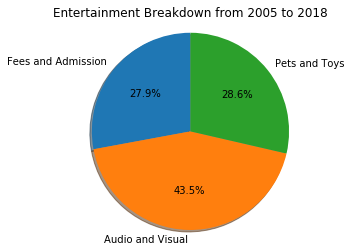

In [62]:
labels =  'Fees and Admission','Audio and Visual', 'Pets and Toys'
sizes = [fees_admin, audio_visual, pets_play]
explode = ( 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Apparel')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Entertainment Breakdown from 2005 to 2018')
plt.show()

In [63]:
df = df.sort_values(['seriesID','year'], ascending = True).reset_index(drop=True)
df

,year,period,periodName,latest,value,footnotes,seriesID
0,2006,A01,Annual,NaN,1874.0,,CXUAPPARELLB1101M
1,2007,A01,Annual,NaN,1881.0,,CXUAPPARELLB1101M
2,2008,A01,Annual,NaN,1801.0,,CXUAPPARELLB1101M
3,2009,A01,Annual,NaN,1725.0,,CXUAPPARELLB1101M
4,2010,A01,Annual,NaN,1700.0,,CXUAPPARELLB1101M
...,...,...,...,...,...,...,...
203,2014,A01,Annual,NaN,551.0,,CXUWOMENSLB1101M
204,2015,A01,Annual,NaN,596.0,,CXUWOMENSLB1101M
205,2016,A01,Annual,NaN,571.0,,CXUWOMENSLB1101M
206,2017,A01,Annual,NaN,580.0,,CXUWOMENSLB1101M


In [64]:
df["value"].pct_change()

0           NaN
1      0.003735
2     -0.042531
3     -0.042199
4     -0.014493
         ...   
203    0.045541
204    0.081670
205   -0.041946
206    0.015762
207    0.100000
Name: value, Length: 208, dtype: float64

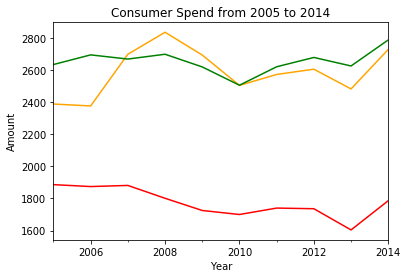

In [65]:
apparel = bls.get_series('CXUAPPARELLB1101M', 2005, 2014)
entertainment = bls.get_series('CXUENTRTAINLB1101M', 2005, 2014)
food_away = bls.get_series('CXUFOODAWAYLB1101M', 2005, 2014)


apparel.plot(kind='line', x='date',y='value', color='red')
entertainment.plot(kind='line', x='date',y='value', color='orange')
food_away.plot(kind='line', x='date',y='value', color='green')

plt.title('Consumer Spend from 2005 to 2014')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()